sklearn.cross_validation被废弃,改为sklearn.model_selection

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

## 加载数据，和以前不一样

### X=digits.data是0到9的数字图片,y=digits.target是标签

In [2]:
# load data
digits = load_digits()
X = digits.data
y = digits.target
#LableBinarizer()将标签二值化，转换为数字标签，也适用于两类以上的标签；
#fit_transform()使标签标准化
y = LabelBinarizer().fit_transform(y)
#train_test_split(data , target , test_size= [, random_state=]),test_size是test数据占比
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.3)

## 定义添加神经层的函数

In [3]:
def add_layer(inputs , in_size , out_size , layer_name , activation_function=None):
    Weights = tf.Variable(tf.random.normal([in_size , out_size]))
    biases = tf.Variable(tf.zeros([1 , out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs , Weights)+biases
    
    Wx_plus_b = tf.nn.dropout(Wx_plus_b , keep_prob)###Dropout主函数
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    tf.summary.histogram(layer_name+'/outputs',outputs)#在tensorboard的history中显示outputs，最少要有一个historgram
    return outputs

## 定义用于输入的placeholder

In [4]:
# define placeholder for inputs to network
#keep_prob = tf.placeholder(tf.float32)######Dropout所需，保证有一定的数据不能舍去
keep_prob = tf.placeholder(tf.float32)

xs = tf.placeholder(tf.float32 , [None ,64])#8*8=64
ys = tf.placeholder(tf.float32 , [None ,10])

In [5]:
# add output layer
l1 = add_layer(xs , 64 , 50 , 'l1' , activation_function=tf.nn.tanh)#输出100个是为了看出过拟合
prediction = add_layer(l1 , 50 , 10 , 'l2' , activation_function=tf.nn.softmax)

W0916 09:14:48.144220  3884 deprecation.py:506] From <ipython-input-3-011b672dfbdb>:6: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 定义损失率cross_entropy(即loss)

In [6]:
# the loss between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction) , reduction_indices=[1]))#loss
tf.summary.scalar('loss' , cross_entropy)#在tensorboard的scalar中显示loss/cross_entropy

<tf.Tensor 'loss:0' shape=() dtype=string>

## 训练方式

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

## 建立会话

In [8]:
sess = tf.Session()

## 输出到tensorboard所需要的文件

In [9]:
# summary writer goes in here 
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter("logs/train" , sess.graph)
test_writer = tf.summary.FileWriter("logs/test" , sess.graph)

## 初始化

In [10]:
sess.run(tf.global_variables_initializer())

## 训练

In [11]:
for i in range(500):
    #sess.run(train_step , feed_dict={xs:X_train ,ys:y_train , keep_prob:0.5})###此处保证50%不被舍弃
    sess.run(train_step , feed_dict={xs:X_train ,ys:y_train , keep_prob:0.5})
    if i%50 == 0:
        #record loss
        train_result = sess.run(merged , feed_dict={xs:X_train , ys:y_train , keep_prob:1})###都不舍弃
        test_result = sess.run(merged ,feed_dict={xs:X_test , ys:y_test , keep_prob:1})###都不舍弃
        train_writer.add_summary(train_result , i)
        test_writer.add_summary(test_result ,i)

keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placehold

keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placehold

keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placehold

keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placeholder:0", dtype=float32) 0.5
keep_prob: Tensor("Placehold

**第一次运行结果，有一点点的过拟合，test_data的loss更高一点,此时神经元有100个**
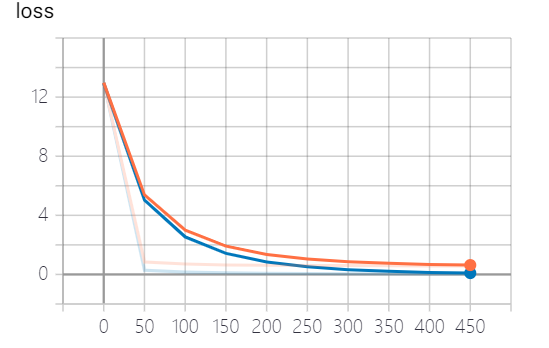

**第二次保留所有数据**
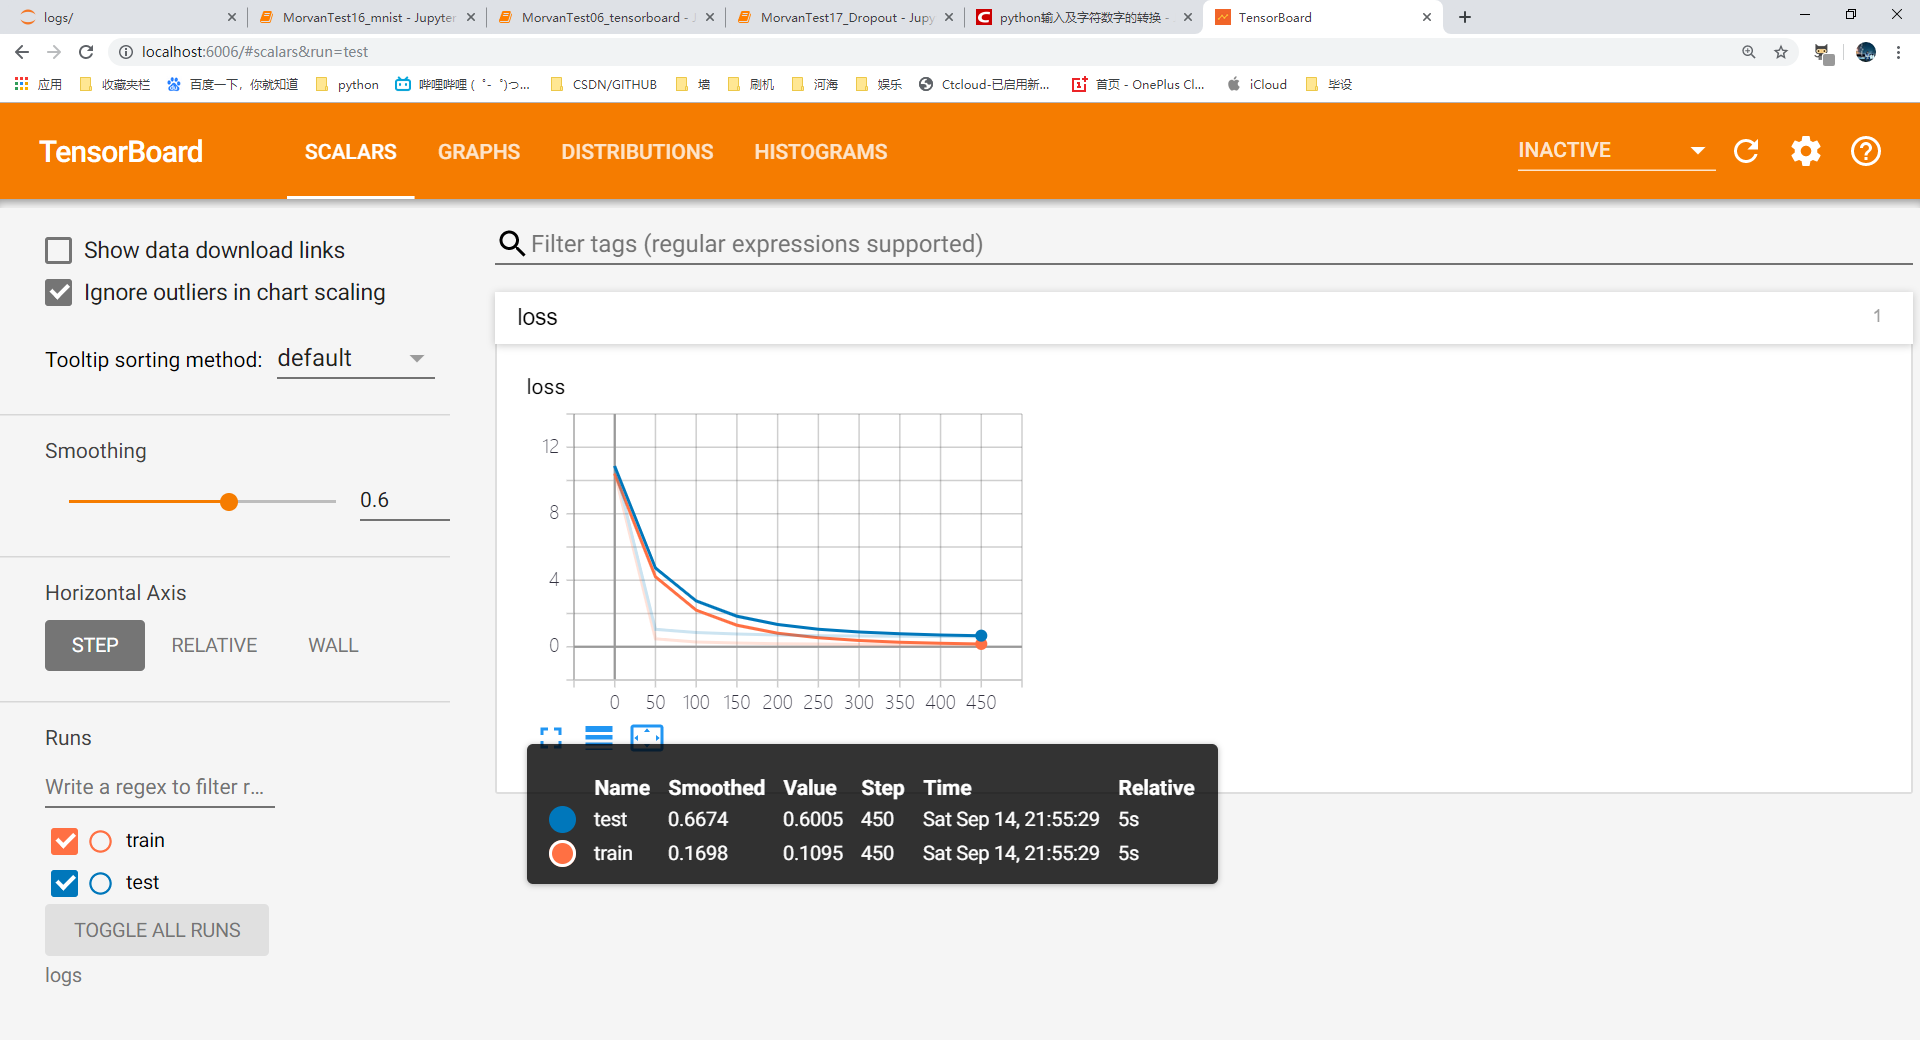

**第三次保留50%的数据**
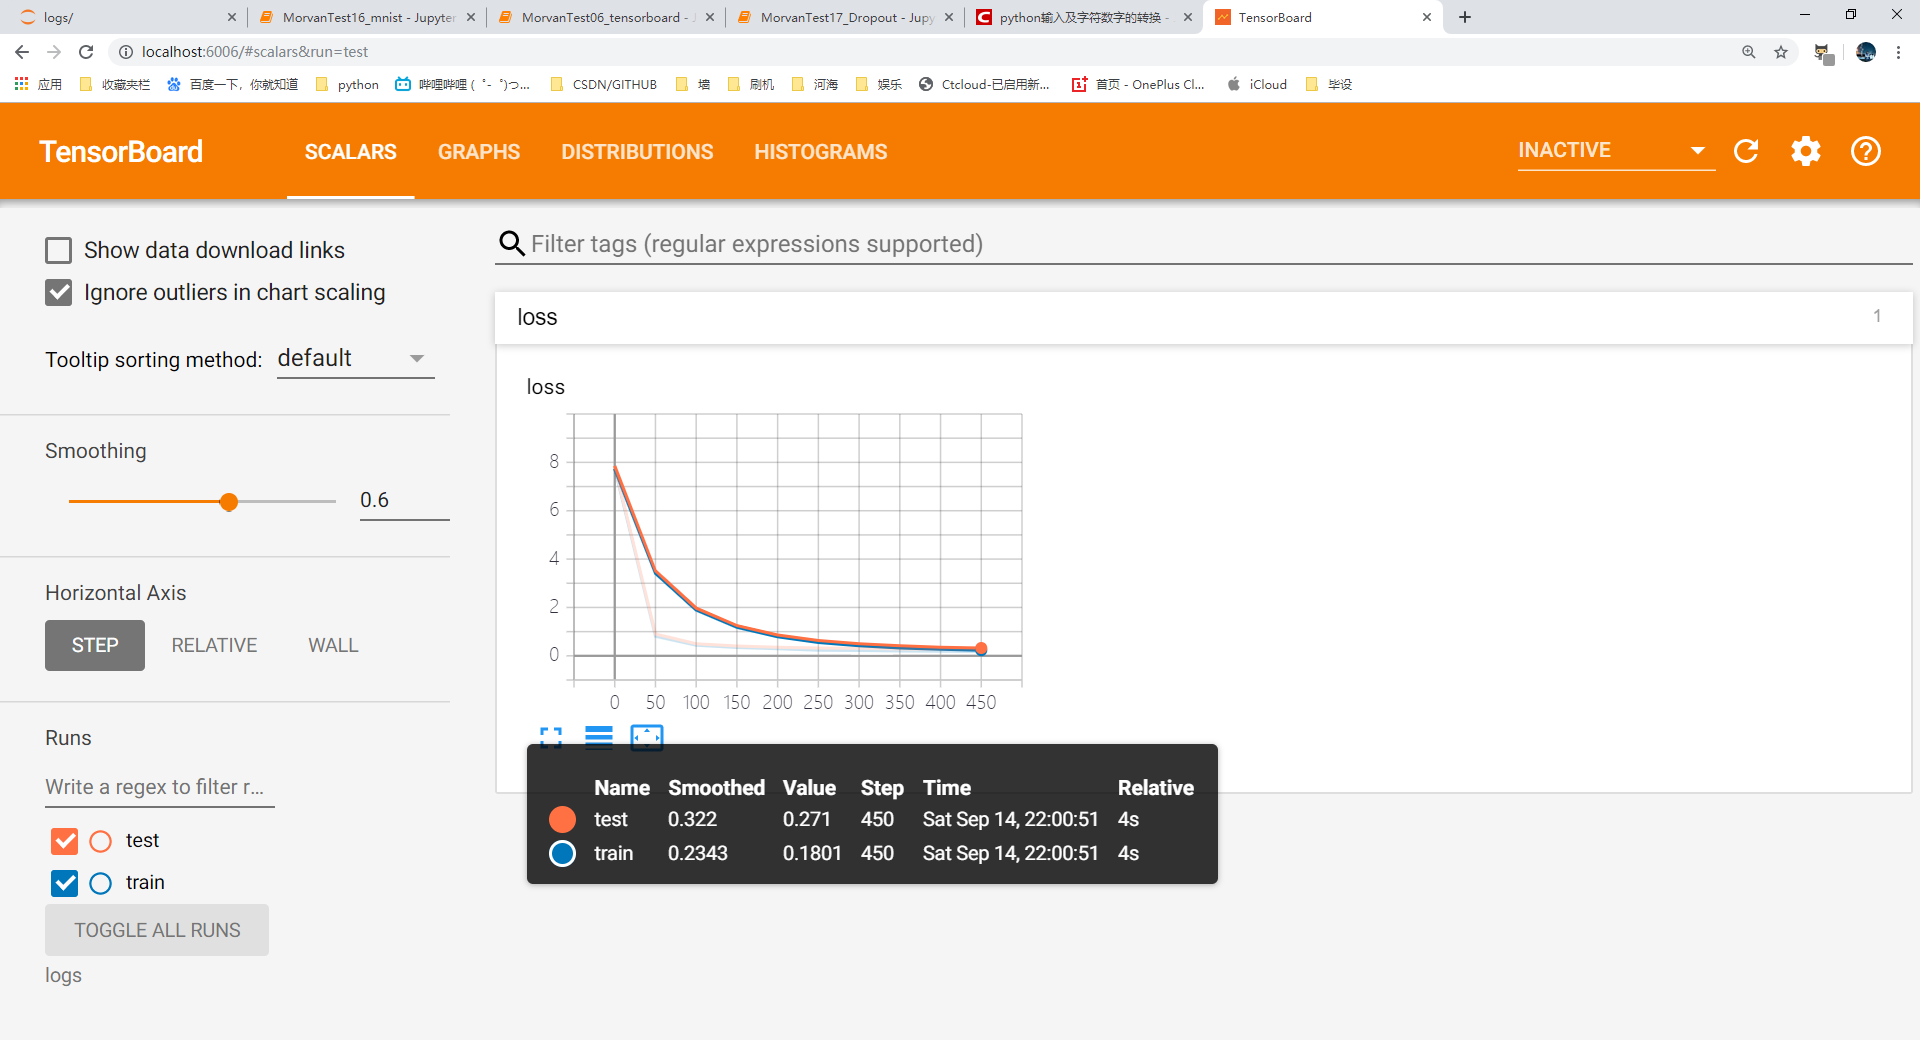